In [1]:
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import requests
from IPython.display import display, HTML
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords

In [2]:
# Download stopwords if not already available
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Fetch the 20 Newsgroups dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = data.data

In [4]:
# Tokenize and preprocess the documents
def preprocess(text):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    tokens = [token for token in tokens if token not in stop_words]  # Stop word removal
    return tokens

processed_docs = [preprocess(doc) for doc in documents]

In [5]:
# Create a dictionary and corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [6]:
# Display the dictionary
print("Dictionary:")
print(dictionary.token2id)

Dictionary:
{'actually': 0, 'also': 1, 'anyway': 2, 'bashers': 3, 'beat': 4, 'better': 5, 'bit': 6, 'bowman': 7, 'confused': 8, 'couple': 9, 'devils': 10, 'disappointed': 11, 'end': 12, 'fans': 13, 'final': 14, 'fo': 15, 'fun': 16, 'game': 17, 'games': 18, 'going': 19, 'however': 20, 'islanders': 21, 'jagr': 22, 'jersey': 23, 'killing': 24, 'kind': 25, 'lack': 26, 'let': 27, 'lose': 28, 'lot': 29, 'man': 30, 'massacre': 31, 'much': 32, 'next': 33, 'non': 34, 'pens': 35, 'pittsburghers': 36, 'playoffs': 37, 'posts': 38, 'praise': 39, 'pretty': 40, 'pulp': 41, 'put': 42, 'puzzled': 43, 'recent': 44, 'regular': 45, 'relief': 46, 'relieved': 47, 'rule': 48, 'season': 49, 'see': 50, 'showed': 51, 'since': 52, 'stats': 53, 'sure': 54, 'thought': 55, 'watch': 56, 'worse': 57, 'anyone': 58, 'ati': 59, 'brother': 60, 'bus': 61, 'card': 62, 'diamond': 63, 'email': 64, 'farenheit': 65, 'graphics': 66, 'high': 67, 'ideas': 68, 'local': 69, 'market': 70, 'matt': 71, 'mb': 72, 'orchid': 73, 'perform

In [7]:
# Display the corpus
print("\nCorpus:")
for doc in corpus[:5]:  # Display the first 5 documents
    print(doc)


Corpus:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 5), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)]
[(58, 1), (59, 1), (60, 1), (61, 2), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)]
[(8, 2), (19, 1), (27, 1), (52, 3), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 3), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (10

In [8]:
# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [9]:
# Prepare the visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [10]:
# Save the visualization to an HTML file
pyLDAvis.save_html(vis, 'lda_vis.html')

In [11]:
# Fetch the CSS and JavaScript files
ldavis_css = requests.get('https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.css').text
ldavis_js = requests.get('https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.js').text
d3_js = requests.get('https://d3js.org/d3.v5.min.js').text

In [12]:
# Display the HTML file
display(HTML('lda_vis.html'))

In [14]:
# Create a mask for the word clouds
# Here we use a circular mask; you can create your own shape and use it
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

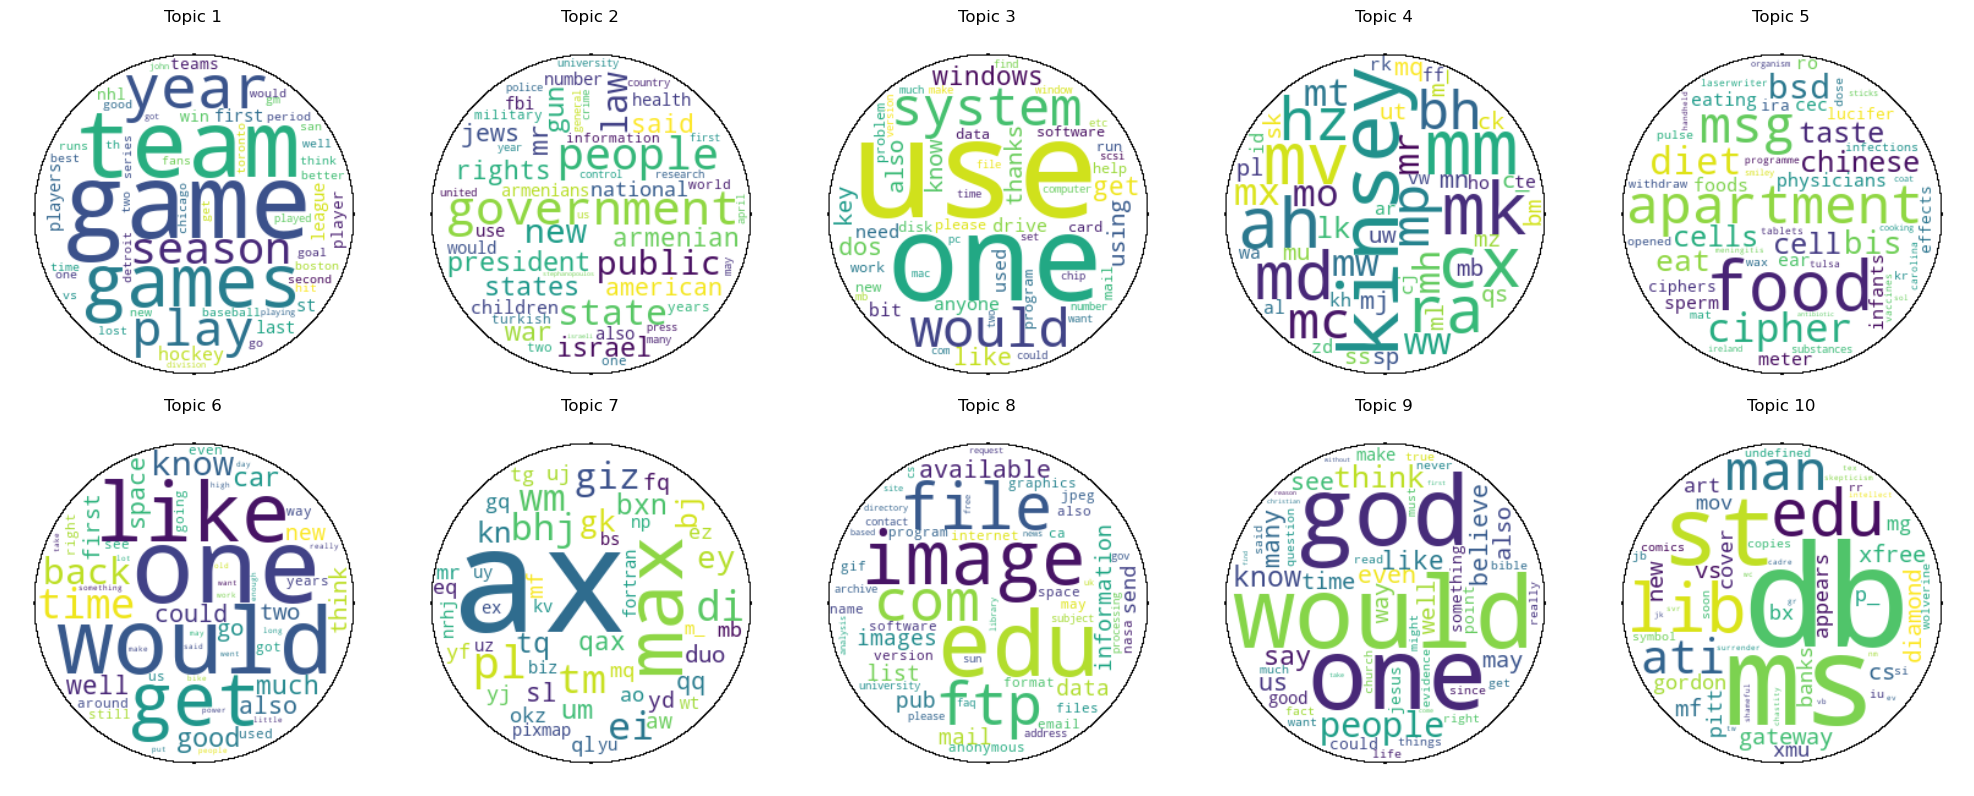

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flatten()):
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask, contour_width=1, contour_color='black').generate_from_frequencies(dict(lda_model.show_topic(i, 50)))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i + 1}')
plt.tight_layout()
plt.show()

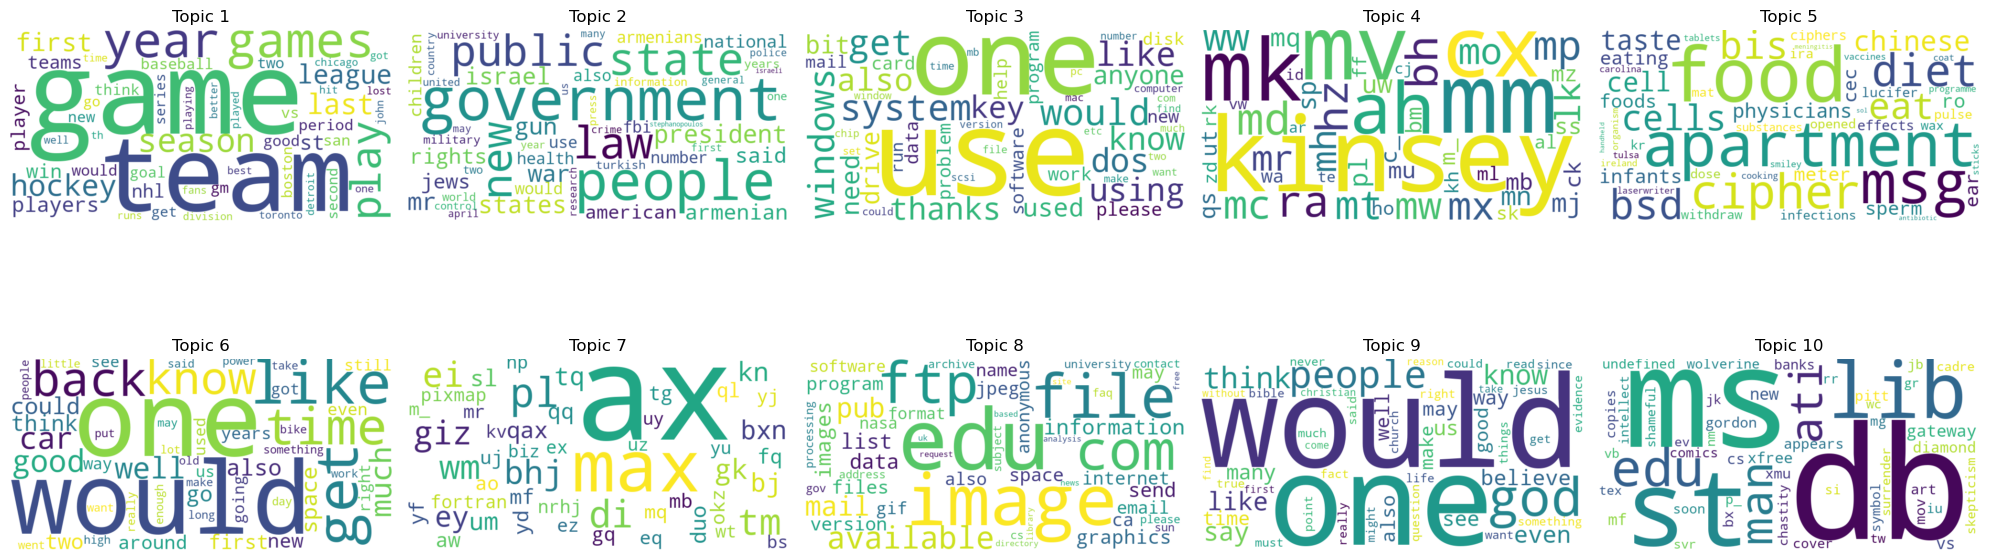

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flatten()):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          contour_width=1, contour_color='black').generate_from_frequencies(dict(lda_model.show_topic(i, 50)))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i + 1}')

plt.tight_layout()
plt.show()